In [27]:
import time
import numpy as np
import matplotlib.pyplot as plt
from graph import Graph
from generator import Generator
from algorithm import TarjansSccAlgorithm

In [28]:
%matplotlib inline

При n = 20, на різних дельта, на списках суміжності

In [29]:
n = 20
delta_values = [5, 10, 20, 40, 60, 80, 95]
generated_graphs = {}
generate_count = 100

for delta in delta_values:
    generator = Generator(n, delta)
    
    generated_graphs[delta] = []

    for _ in range(generate_count):
        generated_graphs[delta].append((generator.vertices, generator.generate_random_graph()))

In [30]:
time_values = np.zeros((len(generated_graphs.keys()), generate_count), dtype=float)

In [31]:
algorithm = TarjansSccAlgorithm()

In [32]:
for k_idx, (k, v) in enumerate(generated_graphs.items()):
    for graph_idx, graph in enumerate(v):
        vertices, edges = graph
        g = Graph(vertices, edges)
        adj_list = g.adjacency_list

        start_time = time.perf_counter()
        algorithm.find_scc_adjacency_list(adj_list)
        end_time = time.perf_counter()

        exec_time = end_time - start_time
        
        time_values[k_idx][graph_idx] = exec_time

In [33]:
mean_times = np.mean(time_values, axis=1) * 1000
mean_times

array([0.02419199, 0.026114  , 0.036819  , 0.05294399, 0.075805  ,
       0.09077001, 0.108384  ])

In [34]:
def plot_performance_analysis(time_values, delta_values, n):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    data_to_plot = [time_values[i] * 1000 for i in range(len(delta_values))]
    ax1.boxplot(data_to_plot, labels=delta_values)
    ax1.set_xlabel('Параметр щільності (δ)', fontsize=12)
    ax1.set_ylabel('Час виконання (мілісекунди)', fontsize=12)
    ax1.set_title(f'Розподіл виконання за часом (при n={n})', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='y')
    
    mean_times = np.mean(time_values, axis=1) * 1000
    std_times = np.std(time_values, axis=1) * 1000
    
    ax2.errorbar(delta_values, mean_times, yerr=std_times,
                 marker='o', capsize=5, linewidth=2, markersize=8, color='blue')
    ax2.set_xlabel('Параметр щільності (δ)', fontsize=12)
    ax2.set_ylabel('Середній час виконання (мілісекунди)', fontsize=12)
    ax2.set_title(f'Середнє виконання у відповідності до щільності (δ) (при n={n})', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    return fig, (ax1, ax2)

C:\Users\Ihor\AppData\Local\Temp\ipykernel_16940\2437171216.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_to_plot, labels=delta_values)


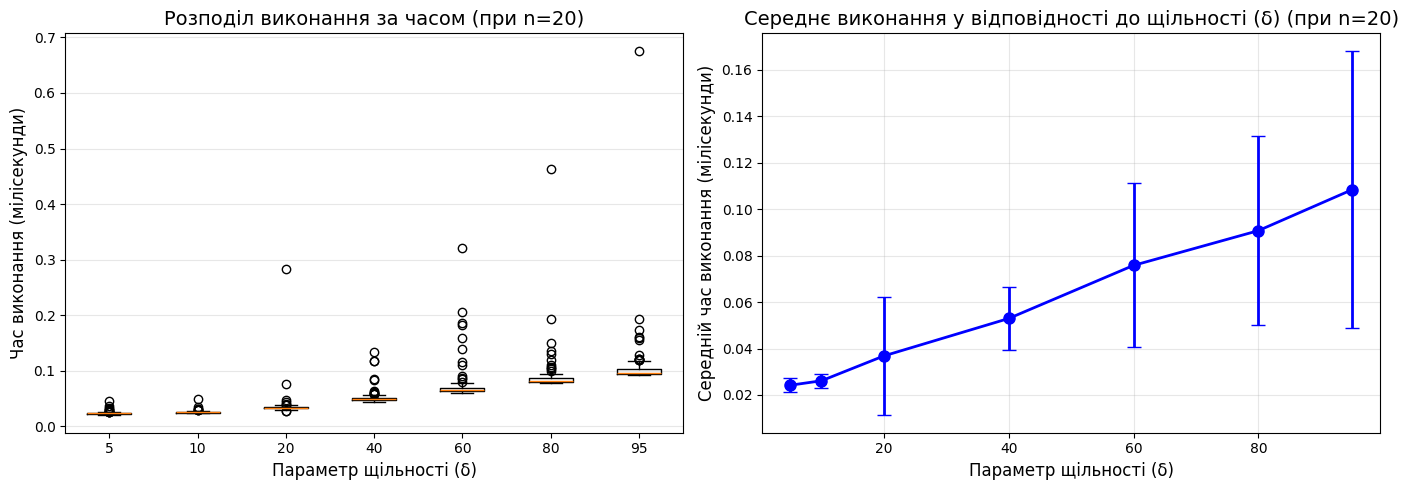

In [35]:
fig, axes = plot_performance_analysis(time_values, delta_values, n)
plt.show()

При n = 20, на різних дельта, на матриці суміжності

In [36]:
time_values = np.zeros((len(generated_graphs.keys()), generate_count), dtype=float)

In [ ]:
for k_idx, (k, v) in enumerate(generated_graphs.items()):
    for graph_idx, graph in enumerate(v):
        vertices, edges = graph
        g = Graph(vertices, edges)
        adjacency_matrix = g.adjacency_matrix

        start_time = time.perf_counter()
        algorithm.find_scc_adjacency_matrix(adjacency_matrix)
        end_time = time.perf_counter()

        exec_time = end_time - start_time
        
        time_values[k_idx][graph_idx] = exec_time    

In [38]:
mean_times = np.mean(time_values, axis=1) * 1000
mean_times

array([0.09633301, 0.11573   , 0.11988799, 0.132507  , 0.15342199,
       0.17755299, 0.19447301])

C:\Users\Ihor\AppData\Local\Temp\ipykernel_16940\2437171216.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_to_plot, labels=delta_values)


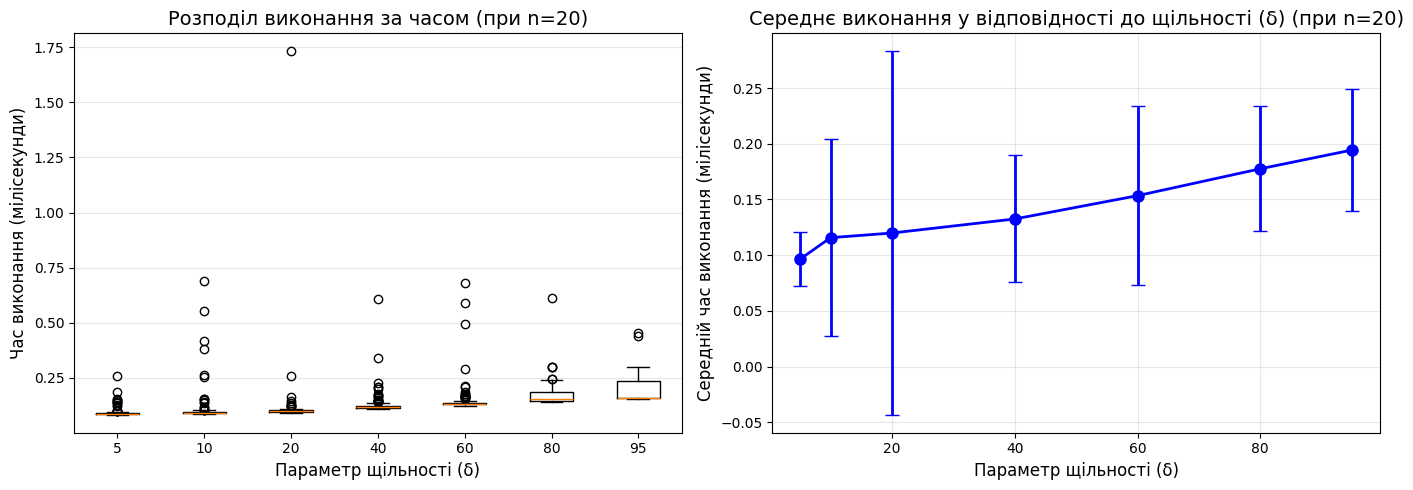

In [39]:
fig, axes = plot_performance_analysis(time_values, delta_values, n)
plt.show()